## 国际金融-Teamwork1-经济周期性分析 Spring 2024 📚

- 画出中国(美国、德国、英国、日本、印度)经济扩张周期和紧缩周期
- 计算扩张周期和紧缩周期的时间长度，以及扩张时期和收缩时期的经济调整深度

**By**: Liyuan Shang, Qingyu Shang

**Date**: 2024.05.07


分歧讨论
1. 使用人均GDP数据 不是总GDP
2. 判断波峰波谷使用数据期数（2期） 
3. 去趋势，去趋势之后的周期项值log(gdp)判断波峰和波谷
4. 去趋势，来计算扩张和收缩幅度,使用波峰波谷当期观察值
5. 绘制偏离百分比图，标注波峰和波谷
6. 连续峰和谷（人工判断）

### GDP去趋势

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'GDP per capita (constant 2015 US$).xlsx'
gdp_data = pd.read_excel(file_path, sheet_name='Sheet1')

# Perform logarithmic transformation for GDP per capita columns (ignoring 'Year')
log_gdp_data = gdp_data.copy()
for column in log_gdp_data.columns[1:]:
    log_gdp_data[column] = np.log(log_gdp_data[column])

# Function to fit quadratic trend
def fit_quadratic_trend(log_gdp_series):
    """Fit a quadratic trend to a given GDP series."""
    t = np.arange(len(log_gdp_series))
    X = np.column_stack([t, t**2])
    model = LinearRegression()
    model.fit(X, log_gdp_series)
    return model.predict(X)

# Initialize dictionaries to store results
trends = {}
exp_trends = {}
residuals_log = {}
residuals_gdp = {}

# Calculate trends and residuals for each country
for column in log_gdp_data.columns[1:]:
    log_gdp_series = log_gdp_data[column].dropna()
    trend = fit_quadratic_trend(log_gdp_series)
    exp_trend = np.exp(trend)
    
    # Residuals in log scale and in real GDP
    residuals_log[column] = log_gdp_series - trend
    residuals_gdp[column] = gdp_data[column].dropna() - exp_trend
    
    # Store the trends
    trends[column] = trend
    exp_trends[column] = exp_trend

# Create a DataFrame for comprehensive data storage
cyclical_data = pd.DataFrame({'Year': gdp_data['Year']})

for column in log_gdp_data.columns[1:]:
    # Create an index that matches the original Year index for accurate alignment
    available_years = log_gdp_data['Year'][log_gdp_data[column].notna()]
    
    # Add raw, log-transformed GDP, trends, and residuals
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_gdp'] = gdp_data[column].dropna().values
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_log_gdp'] = log_gdp_data[column].dropna().values
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_log_trend'] = trends[column]
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_log_residual'] = residuals_log[column].values
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_trend_gdp'] = exp_trends[column]
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_residual_gdp'] = residuals_gdp[column].values
    cyclical_data.loc[cyclical_data['Year'].isin(available_years), column + '_deviation_ratio'] = residuals_gdp[column].values/exp_trends[column]


# Save the comprehensive data
cyclical_data.to_excel('comprehensive_gdp_data.xlsx', index=False)
cyclical_data

,Year,CHN_gdp,CHN_log_gdp,CHN_log_trend,CHN_log_residual,CHN_trend_gdp,CHN_residual_gdp,CHN_deviation_ratio,DEU_gdp,DEU_log_gdp,...,JPN_trend_gdp,JPN_residual_gdp,JPN_deviation_ratio,USA_gdp,USA_log_gdp,USA_log_trend,USA_log_residual,USA_trend_gdp,USA_residual_gdp,USA_deviation_ratio
0,1960,238.217052,5.473182,5.073901,0.399281,159.796457,78.420595,0.490753,NaN,NaN,...,7274.513824,-1013.837854,-0.139368,19135.268182,9.859288,9.873738,-0.014450,19413.780080,-278.511899,-0.014346
1,1961,175.023681,5.164921,5.122052,0.042869,167.679100,7.344581,0.043801,NaN,NaN,...,7731.022103,-778.912506,-0.100752,19253.547329,9.865451,9.901149,-0.035698,19953.281749,-699.734420,-0.035069
2,1962,163.907044,5.099299,5.171032,-0.071733,176.096539,-12.189495,-0.069221,NaN,NaN,...,8206.329987,-704.884543,-0.085895,20116.235124,9.909282,9.928275,-0.018993,20501.947370,-385.712246,-0.018813
3,1963,176.400456,5.172757,5.220842,-0.048085,185.089935,-8.689480,-0.046947,NaN,NaN,...,8700.418801,-645.377406,-0.074178,20701.269947,9.937950,9.955117,-0.017167,21059.712762,-358.442815,-0.017020
4,1964,203.687834,5.316589,5.271480,0.045108,194.704005,8.983830,0.046141,NaN,NaN,...,9213.199176,-310.703623,-0.033724,21599.818705,9.980440,9.981675,-0.001235,21626.504129,-26.685423,-0.001234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,9619.209475,9.171517,9.237261,-0.065744,10272.864620,-653.655145,-0.063629,42928.741237,10.667297,...,34190.084382,1948.444701,0.056989,59607.393660,10.995535,10.993675,0.001860,59496.626927,110.766733,0.001862
59,2019,10155.510883,9.225772,9.333503,-0.107732,11310.687185,-1155.176302,-0.102131,43292.683892,10.675739,...,33893.942033,2149.842369,0.063429,60698.011299,11.013666,11.004599,0.009068,60150.115631,547.895668,0.009109
60,2020,10358.169997,9.245531,9.430575,-0.185044,12463.686461,-2105.516464,-0.168932,41601.973156,10.635903,...,33560.089645,1090.707136,0.032500,58451.606715,10.975954,11.015238,-0.039284,60793.498733,-2341.892018,-0.038522
61,2021,11223.255348,9.325743,9.528475,-0.202732,13745.613755,-2522.358407,-0.183503,42900.022519,10.666628,...,33189.695061,2511.759210,0.075679,61829.845627,11.032141,11.025593,0.006548,61426.300468,403.545159,0.006570


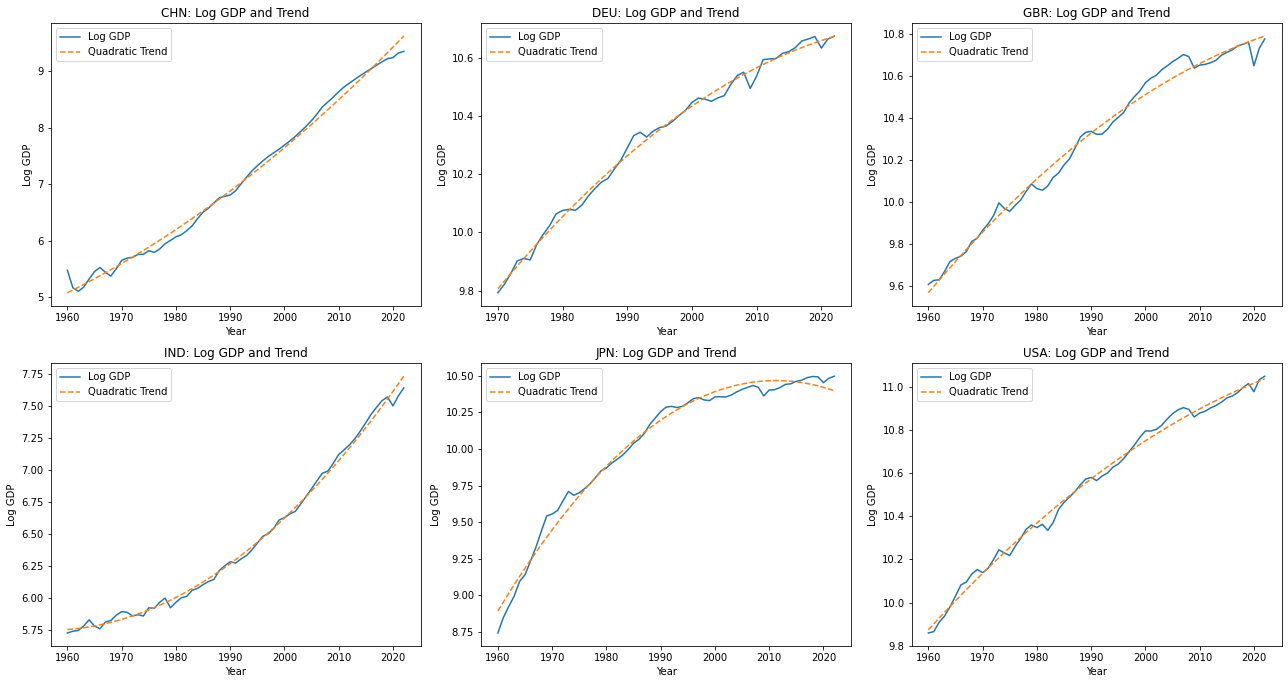

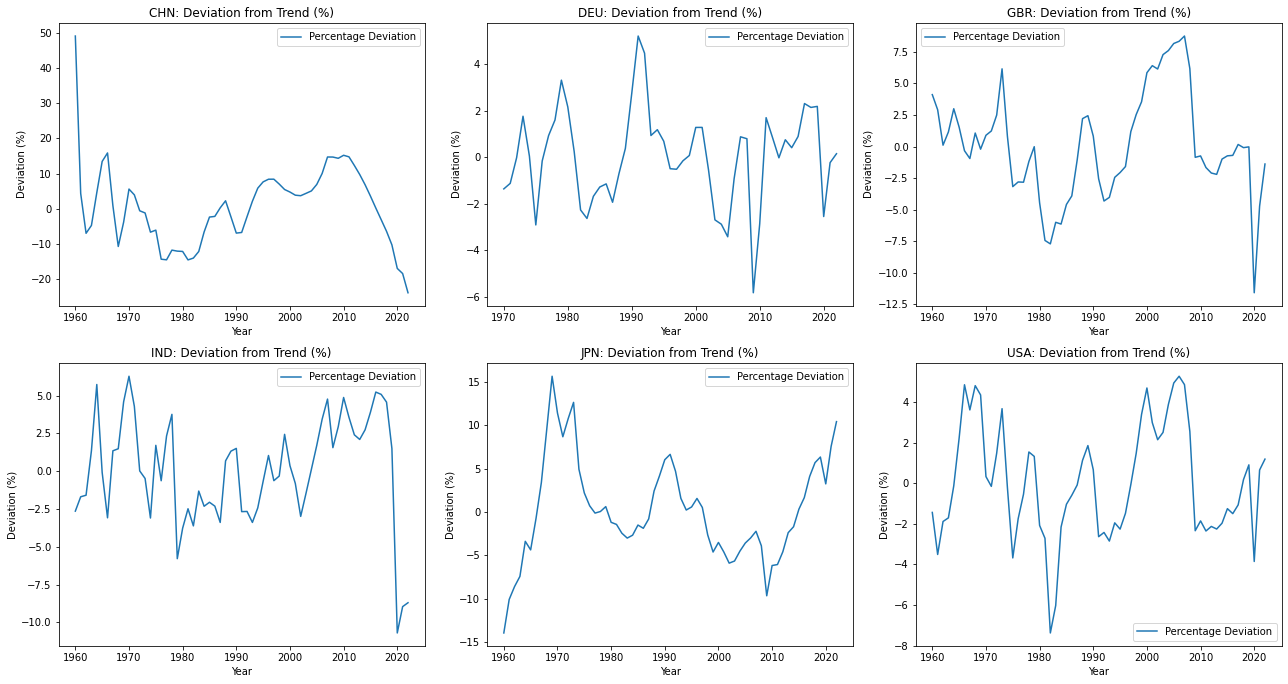

In [2]:
# Function to plot GDP and trend in a subplot
def plot_gdp_and_trend_subplot(ax, country):
    """Plot Log GDP and Trend in the specified subplot axis."""
    ax.plot(cyclical_data['Year'], cyclical_data[country + '_log_gdp'], label='Log GDP')
    ax.plot(cyclical_data['Year'], cyclical_data[country + '_log_trend'], label='Quadratic Trend', linestyle='--')
    ax.set_title(f'{country}: Log GDP and Trend')
    ax.set_xlabel('Year')
    ax.set_ylabel('Log GDP')
    ax.legend()

# Function to plot deviation in a subplot
def plot_deviation_subplot(ax, country):
    """Plot Deviation from Trend (%) in the specified subplot axis."""
    deviation_percentage = cyclical_data[country + '_deviation_ratio'] * 100
    ax.plot(cyclical_data['Year'], deviation_percentage, label='Percentage Deviation')
    ax.set_title(f'{country}: Deviation from Trend (%)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Deviation (%)')
    ax.legend()

# List of six countries to plot
plot_countries = ['CHN', 'DEU', 'GBR', 'IND', 'JPN', 'USA']

# Create a 2x3 grid of subplots for Log GDP and Trend
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
#fig.suptitle('Log GDP and Trend for Six Countries')
for ax, country in zip(axs.flat, plot_countries):
    plot_gdp_and_trend_subplot(ax, country)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
plt.savefig('log_gdp_and_trend.png', dpi=300)
plt.show()

# Create a 2x3 grid of subplots for Deviation from Trend
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
#fig.suptitle('Deviation from Trend (%) for Six Countries')
for ax, country in zip(axs.flat, plot_countries):
    plot_deviation_subplot(ax, country)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
plt.savefig('deviation_from_trend.png', dpi=300)
plt.show()


### 识别波峰波谷

In [ ]:
接下来判断一下每个国家经历的波峰年份和波谷年份：
1. 选取一个判断指标（默认为各个国家的log_residual）
2. 选取一个判断期数n
3. 如果某一年的数值大于前n年且大于后n年，那么该年就是一个波峰年份
4. 如果某一年的数值小于前n年且小于后n年，那么该年就是一个波谷年份
5. 保存每个国家的波峰和波谷年份
6. 注意：德国前几年有些数据缺失

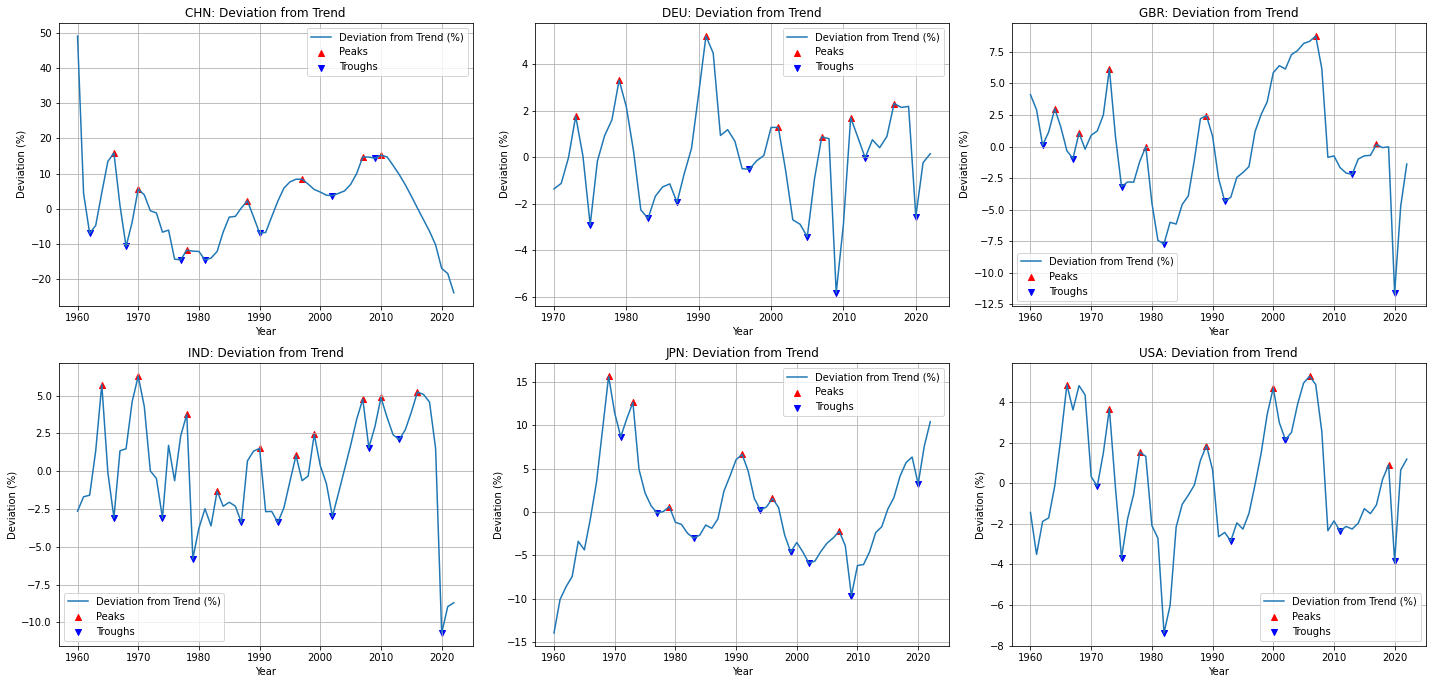

In [8]:
# Load comprehensive data from the previous step
file_path = 'comprehensive_gdp_data.xlsx'
cyclical_data = pd.read_excel(file_path)

def identify_peaks_and_troughs(series, n):
    """Identify peaks and troughs based on a local window of n years."""
    peaks = []
    troughs = []
    for i in range(n, len(series) - n):
        window = series[i - n:i + n + 1]
        if series[i] == max(window):
            peaks.append(i)
        if series[i] == min(window):
            troughs.append(i)
    return peaks, troughs

# Function to mark peaks and troughs on deviation plots
def plot_peaks_troughs_subplot(ax, country, n):
    """Plot Deviation from Trend (%) and mark peaks and troughs in the specified subplot axis."""
    # Retrieve data
    years = cyclical_data['Year']
    deviation_series = (cyclical_data[country + '_deviation_ratio']) * 100
    log_residual_series = cyclical_data[country + '_log_residual']
    
    # Identify peaks and troughs
    peaks, troughs = identify_peaks_and_troughs(log_residual_series.values, n)
    peak_years = years.loc[peaks].values
    trough_years = years.loc[troughs].values
    
    # Plot deviation with peaks and troughs in the given axis
    ax.plot(years, deviation_series, label='Deviation from Trend (%)')
    ax.scatter(peak_years, deviation_series.loc[peaks], color='red', label='Peaks', marker='^')
    ax.scatter(trough_years, deviation_series.loc[troughs], color='blue', label='Troughs', marker='v')
    ax.set_xlabel('Year')
    ax.set_ylabel('Deviation (%)')
    ax.set_title(f'{country}: Deviation from Trend')
    ax.legend()
    ax.grid(True)
    

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
#fig.suptitle('Deviation from Trend with Peaks/Troughs')

# List of six countries to plot
plot_countries = ['CHN', 'DEU', 'GBR', 'IND', 'JPN', 'USA']
n_years = 2  # Window period

# Plot each country's deviation data in the grid
for ax, country in zip(axs.flat, plot_countries):
    plot_peaks_troughs_subplot(ax, country, n_years)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('peak and trough.png', dpi=300)
plt.show()


In [9]:
def plot_deviation_with_peaks_troughs(country, n):
    """Plot Deviation from Trend (%) and mark peaks and troughs."""
    # Retrieve data
    years = cyclical_data['Year']
    deviation_series = (cyclical_data[country + '_residual_gdp'] / cyclical_data[country + '_trend_gdp']) * 100
    log_residual_series = cyclical_data[country + '_log_residual']
    
    # Identify peaks and troughs
    peaks, troughs = identify_peaks_and_troughs(log_residual_series.dropna().values, n)
    peak_years = years.loc[peaks].values
    trough_years = years.loc[troughs].values
    return peak_years, trough_years
    
# Store peaks and troughs in the data
def store_peaks_troughs(countries, n):
    """Store peak and trough years for each country."""
    peaks_troughs = {}
    for country in countries:
        peak_years, trough_years = plot_deviation_with_peaks_troughs(country, n)
        peaks_troughs[country] = {'peaks': peak_years, 'troughs': trough_years}
    return peaks_troughs

# Apply to all countries with a window of 3 years
countries = [col.split('_')[0] for col in cyclical_data.columns if '_log_residual' in col]
peaks_troughs_data = store_peaks_troughs(countries, 2)
peaks_troughs_data

{'CHN': {'peaks': array([1966, 1970, 1978, 1988, 1997, 2007, 2010]),
  'troughs': array([1962, 1968, 1977, 1981, 1990, 2002, 2009])},
 'DEU': {'peaks': array([1963, 1969, 1981, 1991, 1997, 2001, 2007]),
  'troughs': array([1965, 1973, 1977, 1987, 1995, 1999, 2003, 2010])},
 'GBR': {'peaks': array([1964, 1968, 1973, 1979, 1989, 2007, 2017]),
  'troughs': array([1962, 1967, 1975, 1982, 1992, 2013, 2020])},
 'IND': {'peaks': array([1964, 1970, 1978, 1983, 1990, 1996, 1999, 2007, 2010, 2016]),
  'troughs': array([1966, 1974, 1979, 1987, 1993, 2002, 2008, 2013, 2020])},
 'JPN': {'peaks': array([1969, 1973, 1979, 1991, 1996, 2007]),
  'troughs': array([1971, 1977, 1983, 1994, 1999, 2002, 2009, 2020])},
 'USA': {'peaks': array([1966, 1973, 1978, 1989, 2000, 2006, 2019]),
  'troughs': array([1971, 1975, 1982, 1993, 2002, 2011, 2020])}}

In [ ]:
人工修正：
中国 2022年是波谷
日本 1999年不是波谷
日本 2019年是波峰
印度 1996年不是波峰
德国 1987年不是波谷

In [10]:
# Correct China (CHN) peaks
peaks_troughs_data['CHN']['troughs'] = np.array([1962, 1968, 1977, 1981, 1990, 2002, 2009, 2022])

# Correct Japan (JPN) peaks and troughs
peaks_troughs_data['JPN']['peaks'] = np.array([1969, 1973, 1979, 1991, 1996, 2007, 2019])
peaks_troughs_data['JPN']['troughs'] = np.array([1971, 1977, 1983, 1994, 2002, 2009, 2020])

# Correct India (IND) peaks
peaks_troughs_data['IND']['peaks'] = np.array([1964, 1970, 1978, 1983, 1990, 1999, 2007, 2010, 2016])

# Correct Germany (DEU) troughs
peaks_troughs_data['DEU']['troughs'] = np.array([1975, 1983, 1997, 2005, 2009, 2013, 2020])

# Verify the updated data
peaks_troughs_data

{'CHN': {'peaks': array([1966, 1970, 1978, 1988, 1997, 2007, 2010]),
  'troughs': array([1962, 1968, 1977, 1981, 1990, 2002, 2009, 2022])},
 'DEU': {'peaks': array([1963, 1969, 1981, 1991, 1997, 2001, 2007]),
  'troughs': array([1975, 1983, 1997, 2005, 2009, 2013, 2020])},
 'GBR': {'peaks': array([1964, 1968, 1973, 1979, 1989, 2007, 2017]),
  'troughs': array([1962, 1967, 1975, 1982, 1992, 2013, 2020])},
 'IND': {'peaks': array([1964, 1970, 1978, 1983, 1990, 1999, 2007, 2010, 2016]),
  'troughs': array([1966, 1974, 1979, 1987, 1993, 2002, 2008, 2013, 2020])},
 'JPN': {'peaks': array([1969, 1973, 1979, 1991, 1996, 2007, 2019]),
  'troughs': array([1971, 1977, 1983, 1994, 2002, 2009, 2020])},
 'USA': {'peaks': array([1966, 1973, 1978, 1989, 2000, 2006, 2019]),
  'troughs': array([1971, 1975, 1982, 1993, 2002, 2011, 2020])}}

### 周期特征

1. contraction duration是从一个peak到一个through的时间长度
2. contraction amplitude是从一个peak到一个through的收缩幅度，计算方法是用through当年的真实GDP-peak当年的真实GDP，再除以peak当年的真实GDP
3. expension duration是从一个through到一个peak的时间长度
4. expension amplitude是从一个through到一个peak的扩张幅度，计算方法是用peak当年的真实GDP-through当年的真实GDP，再除以through当年的真实GDP
5. 每个国家存在多个波峰波谷，那么计算平均值

In [11]:
# Function to calculate contraction and expansion metrics
def calculate_cycle_metrics(peaks, troughs, gdp_years, gdp_series):
    """Calculate contraction and expansion metrics based on mapped indices."""
    contraction_durations = []
    contraction_amplitudes = []
    expansion_durations = []
    expansion_amplitudes = []
    
    # Create a mapping from years to indices in the available GDP data
    year_to_index = {year: idx for idx, year in enumerate(gdp_years)}
    
    # Determine contraction (peak to nearest subsequent trough)
    for peak in peaks:
        if peak in year_to_index:
            peak_index = year_to_index[peak]
            subsequent_troughs = [year_to_index[t] for t in troughs if t > peak and t in year_to_index]
            if subsequent_troughs:
                trough_index = subsequent_troughs[0]
                contraction_durations.append(trough_index - peak_index)
                contraction_amplitude = (gdp_series[trough_index] - gdp_series[peak_index]) / gdp_series[peak_index]
                contraction_amplitudes.append(contraction_amplitude)
    
    # Determine expansion (trough to nearest subsequent peak)
    for trough in troughs:
        if trough in year_to_index:
            trough_index = year_to_index[trough]
            subsequent_peaks = [year_to_index[p] for p in peaks if p > trough and p in year_to_index]
            if subsequent_peaks:
                peak_index = subsequent_peaks[0]
                expansion_durations.append(peak_index - trough_index)
                expansion_amplitude = (gdp_series[peak_index] - gdp_series[trough_index]) / gdp_series[trough_index]
                expansion_amplitudes.append(expansion_amplitude)
    
    # Calculate averages
    avg_contraction_duration = np.mean(contraction_durations) if contraction_durations else None
    avg_contraction_amplitude = np.mean(contraction_amplitudes) if contraction_amplitudes else None
    avg_expansion_duration = np.mean(expansion_durations) if expansion_durations else None
    avg_expansion_amplitude = np.mean(expansion_amplitudes) if expansion_amplitudes else None
    
    return {
        'Average Contraction Duration': avg_contraction_duration,
        'Average Contraction Amplitude': avg_contraction_amplitude*100,
        'Average Expansion Duration': avg_expansion_duration,
        'Average Expansion Amplitude': avg_expansion_amplitude*100
    }

# Function to calculate all metrics for each country
def calculate_all_countries_metrics(peaks_troughs_data, cyclical_data):
    """Calculate and print contraction and expansion metrics for each country."""
    metrics_data = {}
    
    for country in peaks_troughs_data:
        peaks = peaks_troughs_data[country]['peaks']
        troughs = peaks_troughs_data[country]['troughs']
        
        # Get the GDP series corresponding to the country's data
        gdp_column = f"{country}_gdp"
        gdp_series = cyclical_data.loc[cyclical_data[gdp_column].notna(), gdp_column].values
        gdp_years = cyclical_data.loc[cyclical_data[gdp_column].notna(), 'Year'].values
        
        # Calculate metrics for the country
        metrics = calculate_cycle_metrics(peaks, troughs, gdp_years, gdp_series)
        metrics_data[country] = metrics
        
    return metrics_data

# Example usage with peaks_troughs_data and cyclical_data
country_metrics = calculate_all_countries_metrics(peaks_troughs_data, cyclical_data)


# Create a DataFrame from the metrics dictionary
data_rows = []
for country, metrics in country_metrics.items():
    row = [country]
    row.extend([metrics.get('Average Contraction Duration', 'N/A'),
                metrics.get('Average Contraction Amplitude', 'N/A'),
                metrics.get('Average Expansion Duration', 'N/A'),
                metrics.get('Average Expansion Amplitude', 'N/A')])
    data_rows.append(row)

# Define the DataFrame
df = pd.DataFrame(data_rows, columns=[
    'Country',
    'Average Contraction Duration (Years)',
    'Average Contraction Amplitude (%)',
    'Average Expansion Duration (Years)',
    'Average Expansion Amplitude (%)'
])

# Round numerical columns to 2 decimal places, excluding non-numeric values
numeric_cols = df.columns[1:]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce').round(2)


df.to_csv('duration_type1.csv', index = False)
df

,Country,Average Contraction Duration (Years),Average Contraction Amplitude (%),Average Expansion Duration (Years),Average Expansion Amplitude (%)
0,CHN,4.71,28.16,3.86,51.96
1,DEU,4.40,2.46,5.00,15.39
2,GBR,3.86,0.37,5.50,18.39
3,IND,2.78,2.77,3.88,20.15
4,JPN,3.14,1.67,4.83,14.86
5,USA,3.29,0.58,5.17,15.55


In [12]:
# Function to calculate contraction and expansion metrics
def calculate_cycle_metrics(peaks, troughs, gdp_years, gdp_series):
    """Calculate contraction and expansion metrics based on mapped indices."""
    contraction_durations = []
    contraction_amplitudes = []
    expansion_durations = []
    expansion_amplitudes = []
    
    # Create a mapping from years to indices in the available GDP data
    year_to_index = {year: idx for idx, year in enumerate(gdp_years)}
    
    # Determine contraction (peak to nearest subsequent trough)
    for peak in peaks:
        if peak in year_to_index:
            peak_index = year_to_index[peak]
            subsequent_troughs = [year_to_index[t] for t in troughs if t > peak and t in year_to_index]
            if subsequent_troughs:
                trough_index = subsequent_troughs[0]
                contraction_durations.append(trough_index - peak_index)
                contraction_amplitude = (gdp_series[trough_index] - gdp_series[peak_index])
                contraction_amplitudes.append(contraction_amplitude)
    
    # Determine expansion (trough to nearest subsequent peak)
    for trough in troughs:
        if trough in year_to_index:
            trough_index = year_to_index[trough]
            subsequent_peaks = [year_to_index[p] for p in peaks if p > trough and p in year_to_index]
            if subsequent_peaks:
                peak_index = subsequent_peaks[0]
                expansion_durations.append(peak_index - trough_index)
                expansion_amplitude = (gdp_series[peak_index] - gdp_series[trough_index])
                expansion_amplitudes.append(expansion_amplitude)
    
    # Calculate averages
    avg_contraction_duration = np.mean(contraction_durations) if contraction_durations else None
    avg_contraction_amplitude = np.mean(contraction_amplitudes) if contraction_amplitudes else None
    avg_expansion_duration = np.mean(expansion_durations) if expansion_durations else None
    avg_expansion_amplitude = np.mean(expansion_amplitudes) if expansion_amplitudes else None
    
    return {
        'Average Contraction Duration': avg_contraction_duration,
        'Average Contraction Amplitude': avg_contraction_amplitude*100,
        'Average Expansion Duration': avg_expansion_duration,
        'Average Expansion Amplitude': avg_expansion_amplitude*100
    }

# Function to calculate all metrics for each country
def calculate_all_countries_metrics(peaks_troughs_data, cyclical_data):
    """Calculate and print contraction and expansion metrics for each country."""
    metrics_data = {}
    
    for country in peaks_troughs_data:
        peaks = peaks_troughs_data[country]['peaks']
        troughs = peaks_troughs_data[country]['troughs']
        
        # Get the GDP series corresponding to the country's data
        gdp_column = f"{country}_deviation_ratio"
        gdp_series = cyclical_data.loc[cyclical_data[gdp_column].notna(), gdp_column].values
        gdp_years = cyclical_data.loc[cyclical_data[gdp_column].notna(), 'Year'].values
        
        # Calculate metrics for the country
        metrics = calculate_cycle_metrics(peaks, troughs, gdp_years, gdp_series)
        metrics_data[country] = metrics
        
    return metrics_data

# Example usage with peaks_troughs_data and cyclical_data
country_metrics = calculate_all_countries_metrics(peaks_troughs_data, cyclical_data)


# Create a DataFrame from the metrics dictionary
data_rows = []
for country, metrics in country_metrics.items():
    row = [country]
    row.extend([metrics.get('Average Contraction Duration', 'N/A'),
                metrics.get('Average Contraction Amplitude', 'N/A'),
                metrics.get('Average Expansion Duration', 'N/A'),
                metrics.get('Average Expansion Amplitude', 'N/A')])
    data_rows.append(row)

# Define the DataFrame
df = pd.DataFrame(data_rows, columns=[
    'Country',
    'Average Contraction Duration (Years)',
    'Average Contraction Amplitude (%)',
    'Average Expansion Duration (Years)',
    'Average Expansion Amplitude (%)'
])

# Round numerical columns to 2 decimal places, excluding non-numeric values
numeric_cols = df.columns[1:]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce').round(2)

df.to_csv('duration_type2.csv', index = False)
df

,Country,Average Contraction Duration (Years),Average Contraction Amplitude (%),Average Expansion Duration (Years),Average Expansion Amplitude (%)
0,CHN,4.71,-14.67,3.86,12.26
1,DEU,4.40,-4.58,5.00,4.27
2,GBR,3.86,-7.80,5.50,5.60
3,IND,2.78,-6.89,3.88,5.70
4,JPN,3.14,-6.82,4.83,5.89
5,USA,3.29,-5.85,5.17,5.37
